In [ ]:
## Theoretical Questions

# 1. What is a Support Vector Machine (SVM)?
# SVM is a supervised learning algorithm used for classification and regression tasks. 
# It finds the optimal hyperplane that best separates classes in a high-dimensional space.

# 2. What is the difference between Hard Margin and Soft Margin SVM?
# - Hard Margin: No misclassification allowed, requires linearly separable data.
# - Soft Margin: Allows some misclassification, useful for non-linearly separable data.

# 3. What is the mathematical intuition behind SVM?
# SVM optimizes the margin between classes using a quadratic optimization problem and Lagrange multipliers 
# to maximize the margin while minimizing classification errors.

# 4. What is the role of Lagrange Multipliers in SVM?
# They help convert the constrained optimization problem into an unconstrained dual problem, making it easier to solve.

# 5. What are Support Vectors in SVM?
# Support vectors are the data points closest to the decision boundary that influence the position and orientation of the hyperplane.

# 6. What is a Support Vector Classifier (SVC)?
# An SVC is an SVM model used for classification tasks, finding the optimal decision boundary between classes.

# 7. What is a Support Vector Regressor (SVR)?
# SVR is an SVM model used for regression, aiming to fit data within a certain margin while minimizing prediction errors.

# 8. What is the Kernel Trick in SVM?
# It transforms non-linearly separable data into a higher-dimensional space where a linear separator can be applied.

# 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
# - Linear: Suitable for linearly separable data.
# - Polynomial: Captures complex patterns with polynomial transformations.
# - RBF: Maps data to infinite dimensions, useful for highly non-linear data.

# 10. What is the effect of the C parameter in SVM?
# Higher C reduces margin, leading to lower bias and higher variance. Lower C increases margin, allowing more misclassification.

# 11. What is the role of the Gamma parameter in RBF Kernel SVM?
# Controls how far influence of a single training point reaches. Higher gamma results in more complex models.

# 12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
# It is a probabilistic classifier based on Bayes' Theorem, assuming feature independence, making it "naïve."

# 13. What is Bayes’ Theorem?
# It describes the probability of an event based on prior knowledge of related conditions: P(A|B) = (P(B|A) * P(A)) / P(B).

# 14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
# - Gaussian: Assumes continuous data follows a normal distribution.
# - Multinomial: Used for text classification with count-based features.
# - Bernoulli: Handles binary features.

# 15. When should you use Gaussian Naïve Bayes over other variants?
# When dealing with continuous numerical data following a normal distribution.

# 16. What are the key assumptions made by Naïve Bayes?
# - Features are independent.
# - All features contribute equally.

# 17. What are the advantages and disadvantages of Naïve Bayes?
# - Advantages: Fast, works well with high-dimensional data.
# - Disadvantages: Assumption of independence is unrealistic in most cases.

# 18. Why is Naïve Bayes a good choice for text classification?
# It works well with high-dimensional, sparse data and handles noise effectively.

# 19. Compare SVM and Naïve Bayes for classification tasks.
# - SVM: Works well with small datasets and complex decision boundaries.
# - Naïve Bayes: Performs well with large datasets and text classification.

# 20. How does Laplace Smoothing help in Naïve Bayes?
# Prevents zero probabilities by adding a small constant to all probability estimates.


In [1]:
# 21. Train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train SVM model
model = SVC()
model.fit(X_train, y_train)

# Evaluate model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [2]:
# 22. Train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare accuracies
from sklearn.datasets import load_wine

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
print("Linear SVM Accuracy:", accuracy_score(y_test, linear_svm.predict(X_test)))

# RBF SVM
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
print("RBF SVM Accuracy:", accuracy_score(y_test, rbf_svm.predict(X_test)))

Linear SVM Accuracy: 1.0
RBF SVM Accuracy: 0.8055555555555556


In [3]:
# 23. Train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("SVR MSE:", mean_squared_error(y_test, y_pred))

SVR MSE: 1.3320115421348744


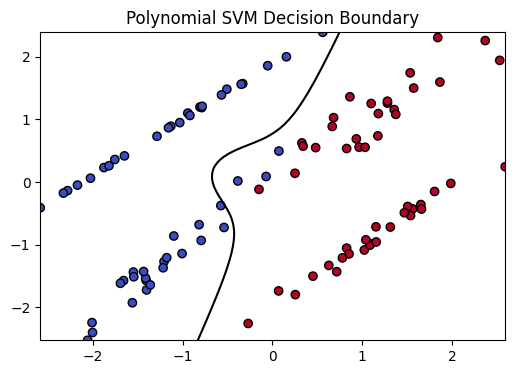

In [5]:
# 24. Train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = poly_svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors='black')
plt.title("Polynomial SVM Decision Boundary")
plt.show()

In [6]:
# 25. Train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# Train GaussianNB model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, predictions))

GaussianNB Accuracy: 0.9736842105263158


In [8]:
# 26. Train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

# Load dataset
newsgroups = fetch_20newsgroups(subset='train', categories=['alt.atheism', 'sci.space'])
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(newsgroups.data)
y_train = newsgroups.target

# Train MultinomialNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Evaluate on test set
newsgroups_test = fetch_20newsgroups(subset='test', categories=['alt.atheism', 'sci.space'])
X_test = vectorizer.transform(newsgroups_test.data)
y_test = newsgroups_test.target
print("MultinomialNB Accuracy:", accuracy_score(y_test, mnb.predict(X_test)))

MultinomialNB Accuracy: 0.9775596072931276


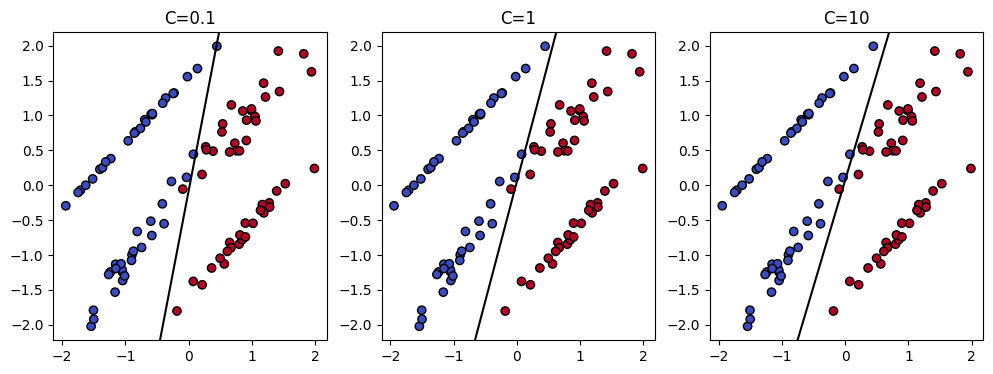

In [9]:
# 27. Train an SVM Classifier with different C values and compare the decision boundaries visually
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

C_values = [0.1, 1, 10]
plt.figure(figsize=(12, 4))
for i, C in enumerate(C_values):
    model = SVC(C=C, kernel='linear')
    model.fit(X, y)
    
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    xlim, ylim = plt.xlim(), plt.ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='black')
    plt.title(f'C={C}')
plt.show()

In [10]:
# 28. Train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
from sklearn.naive_bayes import BernoulliNB

# Generate binary dataset
X_bin = np.random.randint(2, size=(100, 5))
y_bin = np.random.randint(2, size=100)

# Train BernoulliNB model
bnb = BernoulliNB()
bnb.fit(X_bin, y_bin)
predictions = bnb.predict(X_bin)
print("BernoulliNB Accuracy:", accuracy_score(y_bin, predictions))

BernoulliNB Accuracy: 0.64


In [12]:
# 29. Apply feature scaling before training an SVM model and compare results with unscaled data
from sklearn.preprocessing import StandardScaler

# Without Scaling
svm_unscaled = SVC()
svm_unscaled.fit(X_train, y_train)
print("Unscaled SVM Accuracy:", accuracy_score(y_test, svm_unscaled.predict(X_test)))

# With Scaling
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train)
print("Scaled SVM Accuracy:", accuracy_score(y_test, svm_scaled.predict(X_test_scaled)))

Unscaled SVM Accuracy: 0.8737727910238429
Scaled SVM Accuracy: 0.8709677419354839


In [14]:
# 30. Train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing
# Convert sparse matrix to dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Without Laplace Smoothing
gnb_no_smoothing = GaussianNB(var_smoothing=0)
gnb_no_smoothing.fit(X_train_dense, y_train)
print("GaussianNB Accuracy without Laplace Smoothing:", accuracy_score(y_test, gnb_no_smoothing.predict(X_test_dense)))

# With Laplace Smoothing
gnb_smoothing = GaussianNB()
gnb_smoothing.fit(X_train_dense, y_train)
print("GaussianNB Accuracy with Laplace Smoothing:", accuracy_score(y_test, gnb_smoothing.predict(X_test_dense)))
from sklearn.metrics import log_loss

nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), y_train)  # Convert sparse matrix to dense
y_pred_prob = nb_model.predict_proba(X_test.toarray())  # Convert sparse matrix to dense
print("Log Loss:", log_loss(y_test, y_pred_prob))

C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


GaussianNB Accuracy without Laplace Smoothing: 0.4474053295932679
GaussianNB Accuracy with Laplace Smoothing: 0.9579242636746143
Log Loss: 1.5165632562040878


In [15]:
# 31. Train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best Score: 0.9888241686589871


In [16]:
# 32. Train an SVM Classifier on an imbalanced dataset and apply class weighting
from sklearn.utils.class_weight import compute_class_weight

# Generate imbalanced data
X_imb, y_imb = make_classification(n_samples=1000, weights=[0.9, 0.1], random_state=42)
class_weights = compute_class_weight('balanced', classes=np.unique(y_imb), y=y_imb)

# Train weighted SVM
svm_weighted = SVC(class_weight='balanced')
svm_weighted.fit(X_imb, y_imb)
print("Weighted SVM Accuracy:", accuracy_score(y_imb, svm_weighted.predict(X_imb)))

Weighted SVM Accuracy: 0.965


In [17]:
# 33. Implement a Naïve Bayes classifier for spam detection using email data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Sample email data
emails = ["Win a lottery now!", "Meeting at 3 PM", "Congratulations! You won a prize", "Work deadline extended"]
labels = [1, 0, 1, 0]  # 1: Spam, 0: Not Spam

vectorizer = TfidfVectorizer()
spam_classifier = make_pipeline(vectorizer, MultinomialNB())
spam_classifier.fit(emails, labels)
print("Spam Classifier Accuracy:", accuracy_score(labels, spam_classifier.predict(emails)))

Spam Classifier Accuracy: 1.0


In [19]:
# 34. Train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy
svm_model = SVC()
nb_model = GaussianNB()

svm_model.fit(X_train_dense, y_train)
nb_model.fit(X_train_dense, y_train)

print("SVM Accuracy:", accuracy_score(y_test, svm_model.predict(X_test_dense)))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_model.predict(X_test_dense)))

SVM Accuracy: 0.8737727910238429
Naïve Bayes Accuracy: 0.9579242636746143


In [22]:
# 35. Perform feature selection before training a Naïve Bayes classifier and compare results
from sklearn.feature_selection import SelectKBest, chi2

# Select top k features
k_best = SelectKBest(score_func=chi2, k=5)
X_train_selected = k_best.fit_transform(X_train_dense, y_train)
X_test_selected = k_best.transform(X_test_dense)

nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
print("Naïve Bayes Accuracy with Feature Selection:", accuracy_score(y_test, nb_selected.predict(X_test_selected)))

Naïve Bayes Accuracy with Feature Selection: 0.7671809256661991


In [23]:
#36. Train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ovr_svm = OneVsRestClassifier(SVC())
ovo_svm = OneVsOneClassifier(SVC())

ovr_svm.fit(X_train, y_train)
ovo_svm.fit(X_train, y_train)

print("OvR SVM Accuracy:", accuracy_score(y_test, ovr_svm.predict(X_test)))
print("OvO SVM Accuracy:", accuracy_score(y_test, ovo_svm.predict(X_test)))

OvR SVM Accuracy: 0.8737727910238429
OvO SVM Accuracy: 0.8737727910238429


In [24]:
# 37. Train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    print(f"{kernel.capitalize()} SVM Accuracy:", accuracy_score(y_test, svm_model.predict(X_test)))

Linear SVM Accuracy: 0.9607293127629734
Poly SVM Accuracy: 0.6185133239831697
Rbf SVM Accuracy: 0.8737727910238429


In [25]:
# 38. Train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
avg_accuracy = cross_val_score(SVC(), X_train, y_train, cv=skf).mean()
print("Stratified K-Fold Cross-Validation Accuracy:", avg_accuracy)

Stratified K-Fold Cross-Validation Accuracy: 0.8984264290371659


In [27]:
# 39. Train a Naïve Bayes classifier using different prior probabilities and compare performance
priors = [[0.7, 0.3], [0.5, 0.5], [0.3, 0.7]]
for prior in priors:
    nb_model = GaussianNB(priors=prior)
    nb_model.fit(X_train_dense, y_train)
    print(f"Naïve Bayes Accuracy with priors {prior}:", accuracy_score(y_test, nb_model.predict(X_test_dense)))

Naïve Bayes Accuracy with priors [0.7, 0.3]: 0.9579242636746143
Naïve Bayes Accuracy with priors [0.5, 0.5]: 0.9579242636746143
Naïve Bayes Accuracy with priors [0.3, 0.7]: 0.9579242636746143


In [ ]:
# 40. Perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy
from sklearn.feature_selection import RFE

rfe = RFE(SVC(kernel='linear'), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train_dense, y_train)
X_test_rfe = rfe.transform(X_test_dense)

svm_rfe = SVC()
svm_rfe.fit(X_train_rfe, y_train)
print("SVM Accuracy with RFE:", accuracy_score(y_test, svm_rfe.predict(X_test_rfe)))

In [30]:
#41. Train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy
from sklearn.metrics import precision_score, recall_score, f1_score

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.8905181587917397
Recall: 0.8737727910238429
F1-Score: 0.8706665647125567


In [32]:
# 42. Train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)
from sklearn.metrics import log_loss

nb_model = GaussianNB()
nb_model.fit(X_train_dense, y_train)
y_pred_prob = nb_model.predict_proba(X_test_dense)
print("Log Loss:", log_loss(y_test, y_pred_prob))

Log Loss: 1.5165632562040878


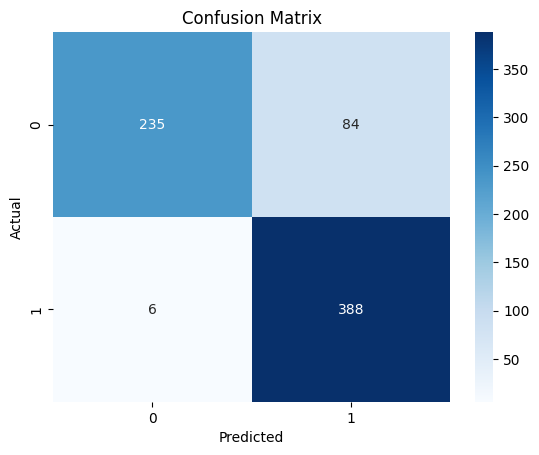

In [33]:
# 43. Train an SVM Classifier and visualize the Confusion Matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [34]:
# 44. Train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE
from sklearn.metrics import mean_absolute_error

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("SVR MAE:", mean_absolute_error(y_test, y_pred))

SVR MAE: 0.2348960842250079


In [36]:
# 45. Train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score
from sklearn.metrics import roc_auc_score

nb_model.fit(X_train_dense, y_train)
y_pred_prob = nb_model.predict_proba(X_test_dense)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

ROC-AUC Score: 0.9559616822876057


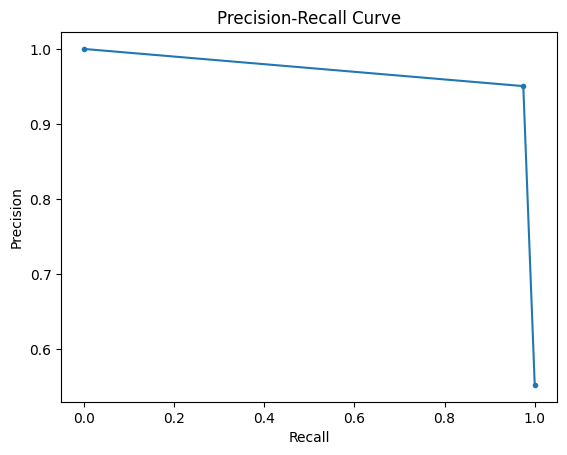

In [37]:
# 46. Train an SVM Classifier and visualize the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()